<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L09%20-%20SVM_solved.ipynb)

# Labor 09 - Support Vektor Machine (SVM)

## 0: Theoretical background

For classification problems, Support Vector Machine (SMV) can be a good solution. SVM can be used to find the line that separates the data with the widest possible boundary for a linearly separable data set.

For two linearly separable clusters, there are infinitely many linear boundaries. We want to choose the one that is furthest from the points of both clusters.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_SVMexample.png?raw=1" width="400">

Our two classes are marked in blue and red. The solid black line is our decision boundary. The highlighted points are the support vectors. The distance between the highlighted points and the decision boundary is the maximum of all possible variations in this case.

Going back to the L03 lab, what it really means is that when we introduce our sigmoid function, we want to define not just a sharp cutoff, but a whole band.

$ h_w(x) = \frac{1}{1+e^{-XW}} $ <br>

$ h_w(x) = g(XW)$

$ h_w(x) = g(z)$

If $y=1$ we want $z\geq1$.<br>
If $y=0$ we want $z\leq-1$.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_SVMsigmoid.png?raw=1" width="350">

The cost function is defined in the following form:

$ C(w) = \frac{1}{m} \sum{-y^i\cdot\log(h_w(x^i))-(1-y^i)\cdot\log(1-h_w(x^i))} $

, where <br>

$ h_w(x) = \frac{1}{1+e^{-z}} $

Let's introduce two new functions: $cost_{1}(z)$ és $cost_{0}(z)$ <br>
so the new range is between 1 and -1.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_newcost.png?raw=1" width="550">

The minimisation of the cost function is still our task, modified as follows:

$min_w\ \frac{1}{m} \Big[ \sum_{i=1}^m y^{(i)}\cdot \big(-log(h_w(x^{(i)})+(1-y^{(i)})\big)\cdot \big(-log(1-h_w(x^{(i)}))\big)\Big] +\frac{\lambda}{2m}\sum_{j=1}^nw_j^2 $

$ min_w\ {\color{red} C} \Big[ \sum_{i=1}^m y^{(i)}\cdot \color{red} {cost_1}(h_w(x^{(i)})+(1-y^{(i)})\big)\cdot\color{red} {cost_0}(1-h_w(x^{(i)}))\big)\Big] +\frac{1}{2}\sum_{j=1}^nw_j^2$

, where $C = 1/\lambda$ <br>
<font color='red'>[WARNING! C in the formula is not the same as C(w) used to denote the cost function]. The notation is used because of the syntax used in the original python package. </font>

Based on the introduction seen previously in the L03-L04 labs, these considerations can therefore be used to extend the SVM method to non-linearly separable classification tasks.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_SVMtransfer.png?raw=1" width="550">

## Kernel trick for Linearly not separatable problems

A good method for finding the most robust boundary for different classification problems is SVM. It is based on the concept of solving linearly separable problems, but can be made suitable for solving virtually arbitrary problems by using different kernels.

The kernel trick is basically to transform your data into a higher dimension, where you can now separate them linearly.

As an illustrative example, the 2D data set below is not linearly separable.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_NonSep.png?raw=1" width="350">

Gaussian kernel (or later using Radial basis function kernel)

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_Gauss.png?raw=1" width="350">

The Gaussian kernel mathematically transforms our data into an infinite dimensional space. This allows us to obtain our solution from a higher dimensional space.

The 3D representation of our data will now be a linearly separable data set.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab09/Pics/L09_Sep.png?raw=1" width="350">

The theoretical summary was just a superficial overview of the mathematical background to get a general idea of what works in our code using higher-level Python packages in the following code.

### 1: Import packages

In [ ]:
import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC
import matplotlib.pyplot as plt

### 2: Load data

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [ ]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab09/Lab9data1.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab09/Lab9data2.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab09/Lab9data3.mat

--2024-12-19 01:08:10--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab09/Lab9data1.mat
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab09/Lab9data1.mat [following]
--2024-12-19 01:08:10--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab09/Lab9data1.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 981 [application/octet-stream]
Saving to: ‘Lab9data1.mat’

Lab9data1.mat       100%[===================>]     981  --.-KB/s    in 0s      

2024-12-19 01:08:10 (29.7 MB/s) - ‘Lab9data1.mat’ saved [981/

Load in the data! Use the scipy package.

In [ ]:
data = loadmat('Lab9data1.mat')
X1 = data["X"]
Y1 = data["y"]

print(X1.shape)
print(Y1.shape)

(51, 2)
(51, 1)


In [ ]:
X1[:5]
Y1[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

### 3: Visualization

Let's vizualise the data set to understand it more.

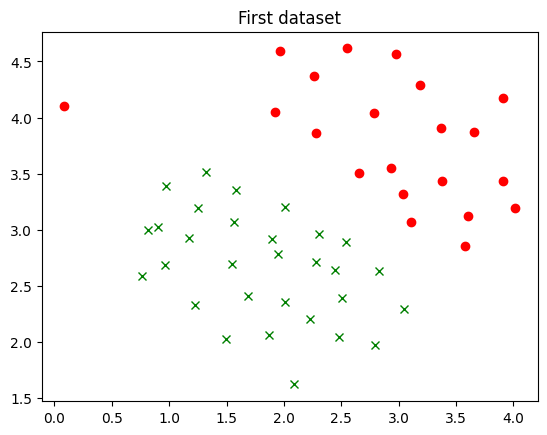

In [ ]:
def dataSeparation(X,Y):
    CLR1 = []                                    # cluster1
    CLR2 = []                                    # cluster2

    for i in range(Y.shape[0]):
        if (Y[i] == 0):
            CLR1.append(X[i,:])
        elif (Y[i] == 1):
            CLR2.append(X[i,:])

    CLR1 = np.asmatrix(CLR1)
    CLR2 = np.asmatrix(CLR2)
    return CLR1, CLR2

CLR11,CLR12 = dataSeparation(X1,Y1)

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')
plt.title("First dataset")
plt.show()

Observing our data, we can see that this data set is linearly separable. We use the SVM model, for which all the necessary algorithms are provided in the sklearn package.

### 4: Train linear SVM

For this task, you don't need any extra kernel (no need to fiddle around), so you can simply set the kernel parameter to linear.
The C parameter is initially set to 0.5 (we will talk about the ravel() function later)

SVC(C=0.5, kernel='linear')


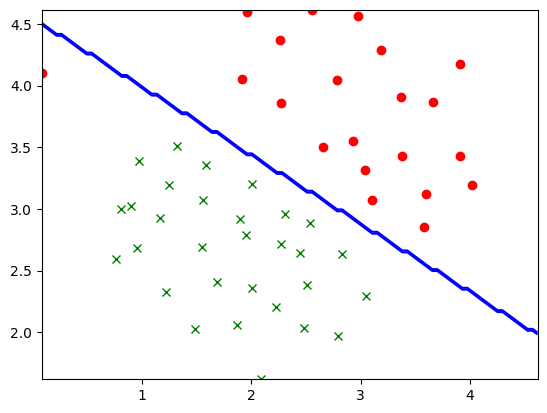

In [ ]:
classifier = SVC(C=0.5,kernel="linear")
print(classifier)
classifier.fit(X1,Y1.ravel())


plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X1[:,0].min(),X1[:,1].max(),num=100),np.linspace(X1[:,1].min(),X1[:,1].max(),num=100))
desBoundary1 = classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape)
plt.contour(X_1,X_2,desBoundary1,1,colors="b")
plt.show()

You can see that 1 point has been classified in the wrong group. At a glance, this point could be a measurement error. If you want your solution to handle this outlier correctly, you should tune parameter C.

### Test: C = 100

SVC(C=100, kernel='linear')


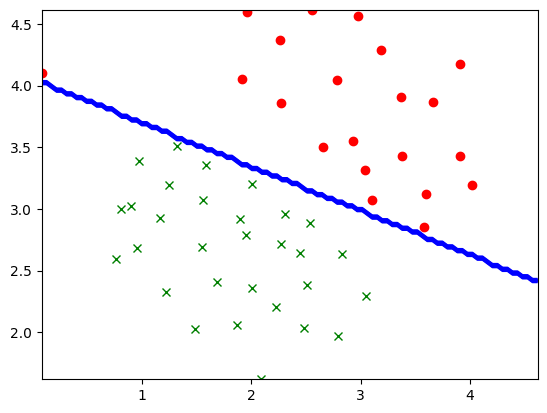

In [ ]:
classifier2 = SVC(C=100,kernel="linear")
print(classifier2)
classifier2.fit(X1,Y1.ravel())

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X1[:,0].min(),X1[:,1].max(),num=100),np.linspace(X1[:,1].min(),X1[:,1].max(),num=100))
desBoundary2 = classifier2.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape)
plt.contour(X_1,X_2,desBoundary2,colors="b")
plt.show()

It can be seen that the task can still be solved, but the safety margin between the two clusters is significantly reduced. It could easily be a case of over-learning.

Let's discuss how the SVM method can be applied to a more complex data set.

### 5: Loading and visualising a second data set

(863, 2)
(863, 1)


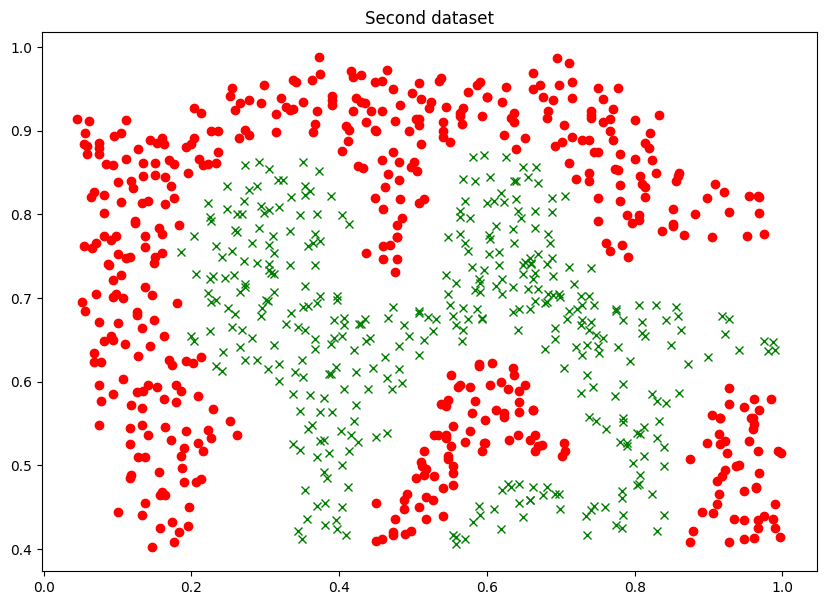

In [ ]:
################### CODE HERE ########################
# Load the second dataset (Lab9data2.mat)
# Separate X and Y
# print out the shapes of the data matrixes

data2=loadmat("Lab9data2.mat")
X2=data2["X"]
Y2=data2["y"]
print(X2.shape)
print(Y2.shape)

def dataSeparation(X,Y):
  CR1=[]
  CLR2=[]
  for i in range(Y.shape[0]):
    if (Y[i]==0):
      CR1.append(X[i,:])
    elif (Y[i]==1):
      CLR2.append(X[i,:])
  # print(CR1)
  CR1=np.asmatrix(CR1)
  # print(CR1)
  CLR2=np.asmatrix(CLR2)
  return CR1,CLR2







######################################################

CLR21,CLR22 = dataSeparation(X2,Y2)

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title("Second dataset")
plt.show()




It can be seen that this data set is not linearly separable. Kernelisation will be required.

### 6: Gauss kernel

The SVC function of the sklearn package has the RBF keyword as kernel parameter to select the Gauss gauge (RBF = Radial basis function)

This is where the ravel() function comes in handy, as when transforming to a higher dimension, care must be taken to ensure that Y is also expanded to the correct dimension.

SVC(gamma=30)


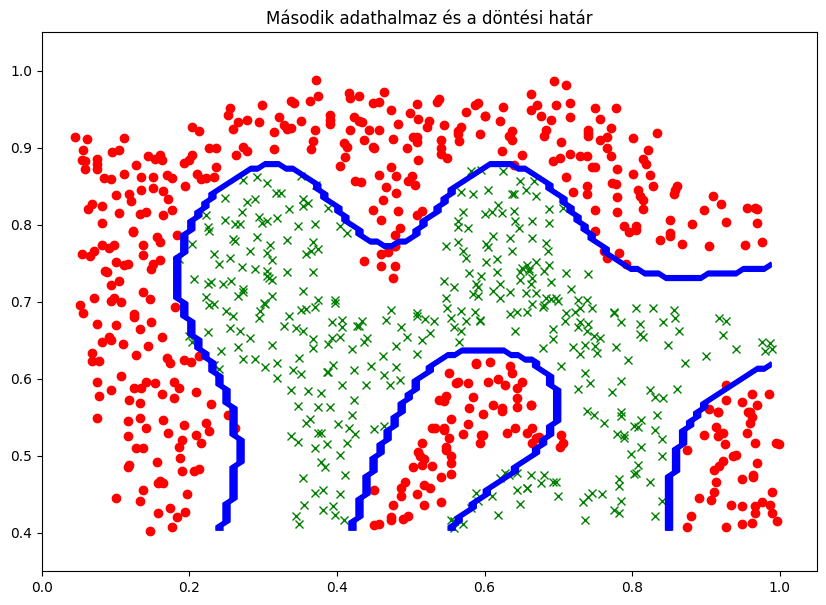

In [ ]:
classifier3 = SVC(kernel = "rbf", gamma=30)
print(classifier3)
classifier3.fit(X2,Y2.ravel())

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title('Második adathalmaz és a döntési határ')

X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
desBoundary3 = classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape)

plt.contour(X_5,X_6,desBoundary3,colors = "b")
plt.xlim(0,1.05)
plt.ylim(0.35,1.05)
plt.show()

SVC(gamma=100)


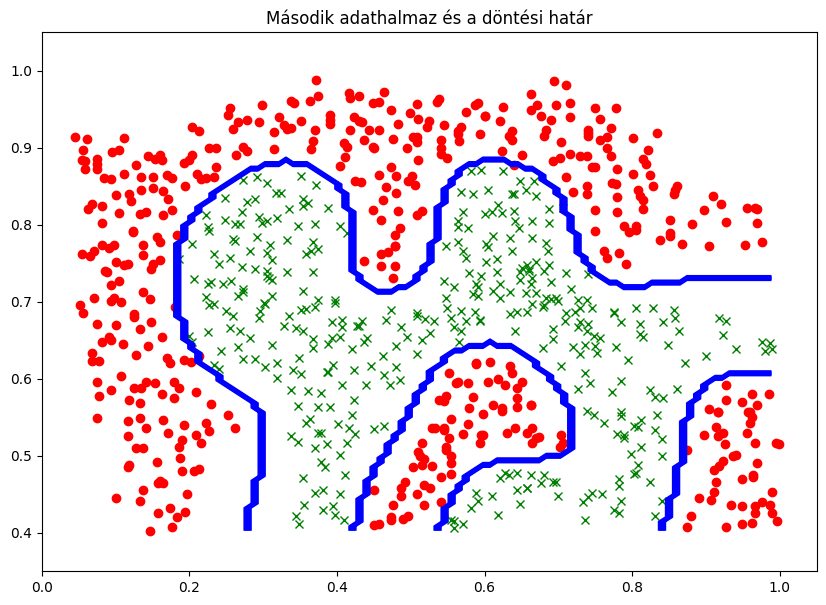

In [ ]:
classifier3 = SVC(kernel = "rbf", gamma=100)
print(classifier3)
classifier3.fit(X2,Y2.ravel())

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title('Második adathalmaz és a döntési határ')

X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
desBoundary3 = classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape)

plt.contour(X_5,X_6,desBoundary3,colors = "b")
plt.xlim(0,1.05)
plt.ylim(0.35,1.05)
plt.show()

### 7: Visualising a third data set

(211, 2)
(211, 1)


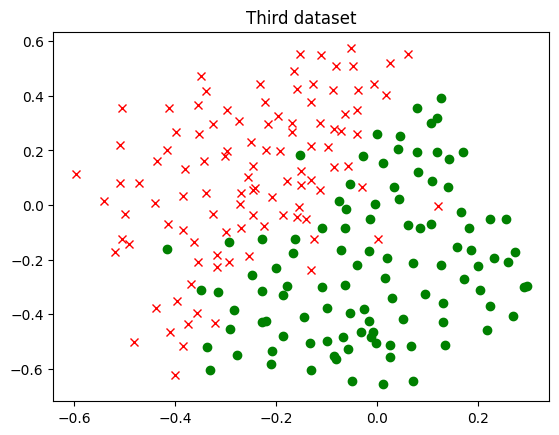

In [ ]:
data = loadmat("Lab9data3.mat")
X3 = data["X"]
Y3 = data["y"]
Xval = data["Xval"]
Yval = data["yval"]
print(X3.shape)
print(Y3.shape)

CLR31,CLR32 = dataSeparation(X3,Y3)

plt.plot(CLR31[:,0],CLR31[:,1],"go")
plt.plot(CLR32[:,0],CLR32[:,1],"rx")
plt.title("Third dataset")
plt.show()


On this dataset we will demonstrate the parameter tuning with some predefined constant C.

### 8: Parameter estimation with C values

In [ ]:
def dataset3Params(X, y, Xval, yval,vals):
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, Y3.ravel(), Xval, Yval.ravel(),C_vals)
classifier4 = SVC(C=C,gamma=gamma)
print(classifier4)
classifier4.fit(X3,Y3.ravel())
print('Best values:\nC =',C,'\ngamma =',gamma)

SVC(C=0.3, gamma=100.0)
Best values:
C = 0.3 
gamma = 100.0


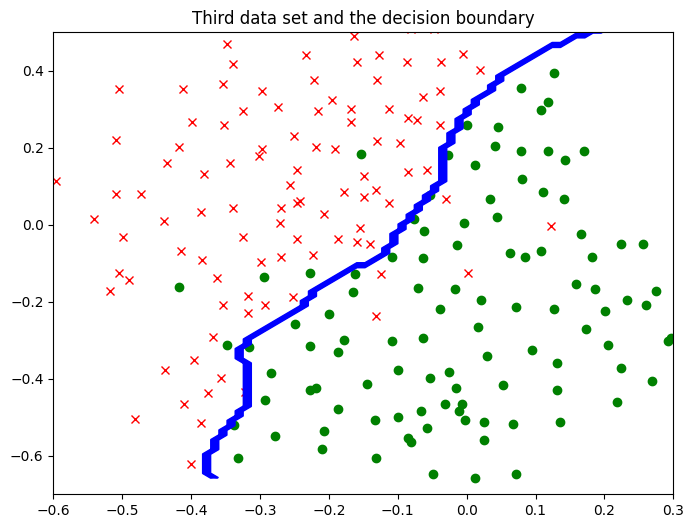

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(CLR31[:,0],CLR31[:,1],"go")
plt.plot(CLR32[:,0],CLR32[:,1],"rx")
plt.title("Third data set and the decision boundary")

# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
desBoundary4 = classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape)
plt.contour(X_7,X_8,desBoundary4,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)
plt.show()

<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>